In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Dealing with missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

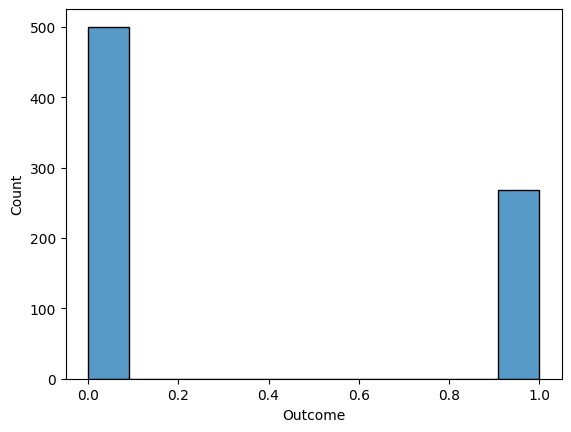

In [ ]:
# Visualising the data and finding information about the target variable
df['Outcome'].value_counts()
sns.histplot(df['Outcome'])
plt.show()

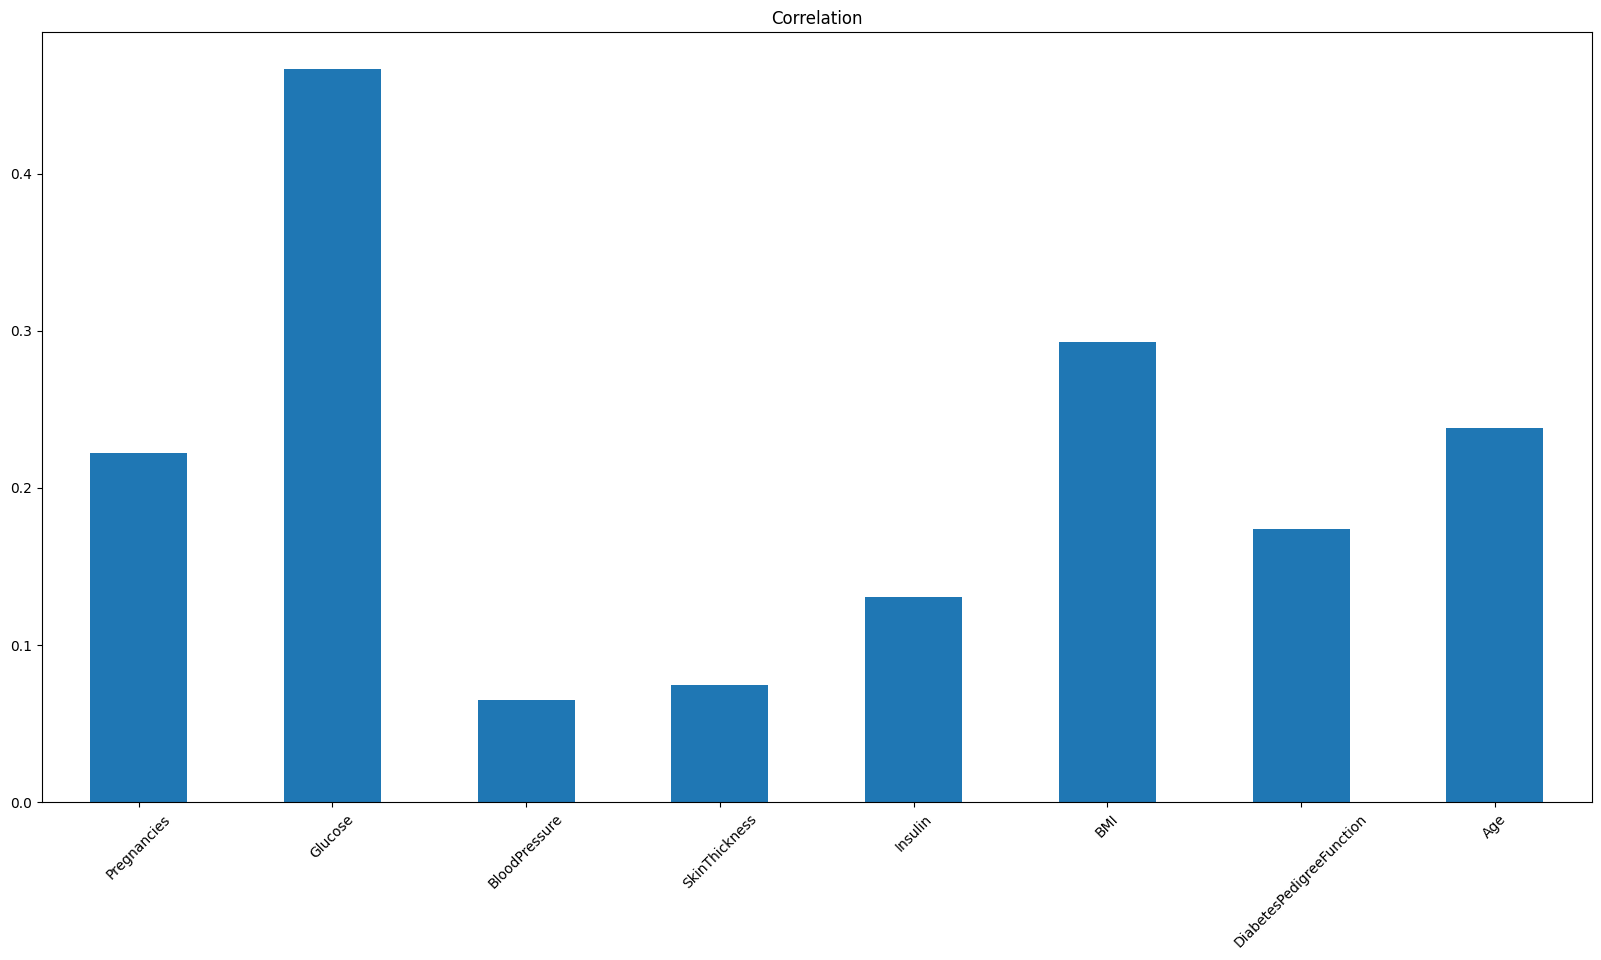

In [ ]:
df_2=df.drop(columns=['Outcome'])
df_2.head()
df_2.corrwith(df['Outcome']).plot.bar(
    figsize=(20,10),title="Correlation",rot=45,grid=False
)
plt.show()

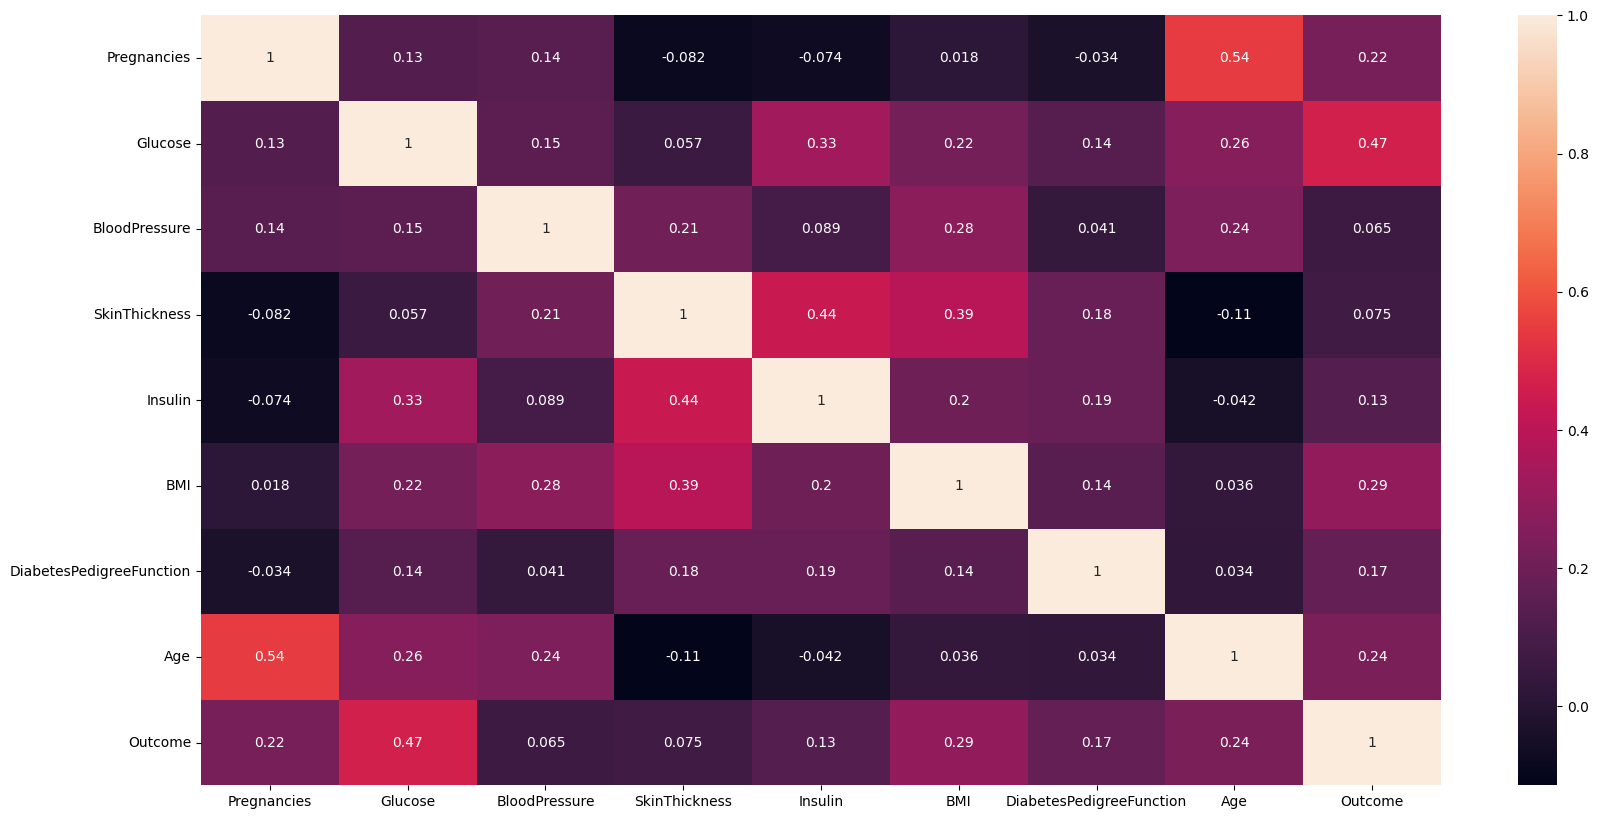

In [ ]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Outcome']),df['Outcome'],
                                               test_size=0.2,random_state=0)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(154,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_1=LogisticRegression()
clf_1.fit(x_train_scaled,y_train)
y_pred1=clf_1.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
acc=accuracy_score(y_test,y_pred1)
f1=f1_score(y_test,y_pred1)
precision=precision_score(y_test,y_pred1)
recall=recall_score(y_test,y_pred1)

In [ ]:
result=pd.DataFrame([['Logistic Regression',acc,f1,precision,recall]],
                    columns=['Model','Accracy','F1','Precision','Recall'])
result

,Model,Accracy,F1,Precision,Recall
0,Logistic Regression,0.824675,0.682353,0.763158,0.617021


In [ ]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(clf_1,x_train_scaled,y_train,cv=10)
accuracy=np.mean(cv_score*100)
deviation=np.std(cv_score*100)
print(accuracy,"%")
print(deviation,"%")

75.72448439978848 %
4.676184579299324 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_2=RandomForestClassifier()
clf_2.fit(x_train_scaled,y_train)
y_pred2=clf_2.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
acc=accuracy_score(y_test,y_pred2)
f1=f1_score(y_test,y_pred2)
precision=precision_score(y_test,y_pred2)
recall=recall_score(y_test,y_pred2)

In [ ]:
result=pd.DataFrame([['Random Forest',acc,f1,precision,recall]],
                    columns=['Model','Accracy','F1','Precision','Recall'])
result

,Model,Accracy,F1,Precision,Recall
0,Random Forest,0.811688,0.674157,0.714286,0.638298


In [ ]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(clf_2,x_train_scaled,y_train,cv=10)
accuracy=np.mean(cv_score*100)
deviation=np.std(cv_score*100)
print(accuracy,"%")
print(deviation,"%")

75.74034902168165 %
5.5511474722590055 %


In [ ]:
from xgboost import XGBClassifier
clf_3=XGBClassifier()
clf_3.fit(x_train_scaled,y_train)
y_pred3=clf_3.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
acc=accuracy_score(y_test,y_pred3)
f1=f1_score(y_test,y_pred3)
precision=precision_score(y_test,y_pred3)
recall=recall_score(y_test,y_pred3)

In [ ]:
result=pd.DataFrame([['XGBoost',acc,f1,precision,recall]],
                    columns=['Model','Accracy','F1','Precision','Recall'])
result

,Model,Accracy,F1,Precision,Recall
0,XGBoost,0.798701,0.693069,0.648148,0.744681


In [ ]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(clf_3,x_train_scaled,y_train,cv=10)
accuracy=np.mean(cv_score*100)
deviation=np.std(cv_score*100)
print(accuracy,"%")
print(deviation,"%")

72.62823902696985 %
4.595415629215513 %


In [ ]:
from sklearn.linear_model import LogisticRegression
clf_final=LogisticRegression()
clf_final.fit(x_train_scaled,y_train)
y_pred_final=clf_final.predict(x_test_scaled)

In [ ]:
single_obs=[[6,148,72,35,0,33.6,0.627,50]]
single_obs=scaler.transform(single_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
prediction=clf_final.predict(single_obs)
if(prediction==1):
  print("You have Diabetes")
else:
  print("You do not have Diabetes")

You have Diabetes


In [ ]:
a=(df['Outcome']==1).sum()
b=(df['Outcome']==0).sum()

In [ ]:
sns.countplot(df['Outcome'])